## Titanic Handling Missing Values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("assets/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1 - Understanding the Data

In [3]:
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns.")

There is 1310 rows and 14 columns.


In [4]:
# let's see the data type formats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

Look like there is a lot of missing values in it

In [7]:
total_null = df.isnull().sum()
total_value = len(df)
percentage = total_null/total_value * 100
print(percentage)

pclass        0.076336
survived      0.076336
name          0.076336
sex           0.076336
age          20.152672
sibsp         0.076336
parch         0.076336
ticket        0.076336
fare          0.152672
cabin        77.480916
embarked      0.229008
boat         62.900763
body         90.763359
home.dest    43.129771
dtype: float64


### Handling Missing Values

#### pclass

So basically pclass stand for passenger class where they represent 1st class, 2nd class and 3rd class ticket holders.

In [8]:
df['pclass'].value_counts()

pclass
3.0    709
1.0    323
2.0    277
Name: count, dtype: int64

In [9]:
df['pclass'].isna().sum()

1

In [10]:
df[df['pclass'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.loc[1300:1310]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1300,3.0,1.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1.0,0.0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's seems like 1309 is use less we drop this row

In [12]:
df = df.drop(1309)

#### Survived

This feature describe how many people survived on that night where in this feature 1 represent for survived or 0 represent for not survived. 

In [13]:
df['survived'].value_counts()

survived
0.0    809
1.0    500
Name: count, dtype: int64

In [14]:
df['survived'].isna().sum()

0

Yayy! there is no null values in this feature

#### Sex

This column describe the gender of passenger which are on board in titanic

In [15]:
df['sex'].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [16]:
df['sex'].isna().sum()

0

Another feature age have 0 null values

#### Age

In [17]:
df['age'].value_counts()

age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: count, Length: 98, dtype: int64

In [18]:
df['age'].isnull().sum()

263

In [19]:
df[df['age'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1.0,0.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0.0,0.0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1.0,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3.0,0.0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0.0,0.0,A/5 2466,8.0500,NaN,S,NaN,NaN,NaN
1297,3.0,0.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN


<Axes: >

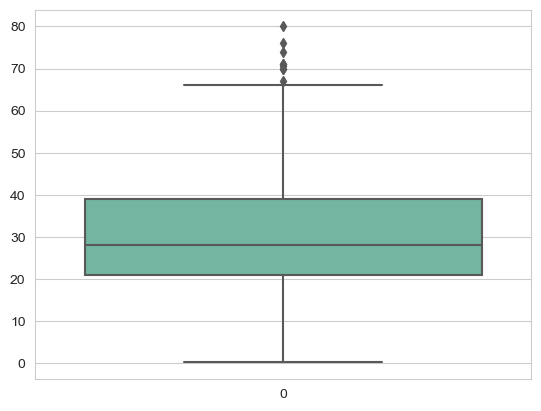

In [20]:
sns.boxplot(df['age'], palette='Set2')

So there is outliers we don't use mean for data imputation we will used median for better approch.

In [21]:
age_median = df['age'].mean()
print(age_median)
temp = df['age'].fillna(age_median)

29.8811345124283


<Axes: >

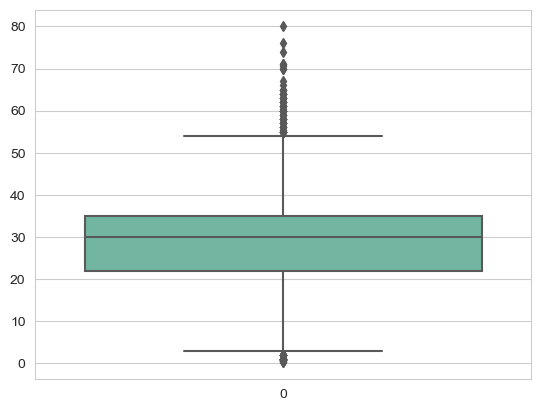

In [22]:
sns.boxplot(temp, palette='Set2')

That method doesn't make any sense so let's try another method.

In [23]:
print(df.groupby(['sex', 'pclass'])['age'].agg(['mean', 'median']).round(1))

               mean  median
sex    pclass              
female 1.0     37.0    36.0
       2.0     27.5    28.0
       3.0     22.2    22.0
male   1.0     41.0    42.0
       2.0     30.8    29.5
       3.0     26.0    25.0


In [24]:
display(df[(df.age.isnull()) & (df.name.str.contains("Master"))])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
672,3.0,0.0,"Betros, Master. Seman",male,NaN,0.0,0.0,2622,7.2292,NaN,C,NaN,NaN,NaN
900,3.0,0.0,"Johnston, Master. William Arthur ""Willie""",male,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN
954,3.0,0.0,"Lefebre, Master. Henry Forbes",male,NaN,3.0,1.0,4133,25.4667,NaN,S,NaN,NaN,NaN
1034,3.0,1.0,"Moubarek, Master. Gerios",male,NaN,1.0,1.0,2661,15.2458,NaN,C,C,NaN,NaN
1035,3.0,1.0,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1.0,1.0,2661,15.2458,NaN,C,C,NaN,NaN
1121,3.0,1.0,"Peter, Master. Michael J",male,NaN,1.0,1.0,2668,22.3583,NaN,C,C,NaN,NaN
1170,3.0,0.0,"Sage, Master. Thomas Henry",male,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1262,3.0,0.0,"van Billiard, Master. James William",male,NaN,1.0,1.0,A/5. 851,14.5000,NaN,S,NaN,NaN,NaN


As explained in the data exploration notebook, we are using a simple filter on the combined dataframe to return all rows which contain 'Master' in the 'Name' column where Age is null.

There are 8 children and all are pclass=3 and male. If we had taken the simple approach of applying the mean() for every missing entry, we would have entered their ages as 30. But we know that they are Children. So they should be <14 for sure and definitely not 30. What value should we fill as their mean age? One good option is to take the avg age of "Male children & use as this as the default value for missing male children age in that class.

In [25]:
df[df.name.str.contains("Master")]['age'].mean()

5.482703773584906

So 5 is a good average age for these 8 boys which is a vast difference from the 50 we earlier wanted to go with.

Before we update the values for these 8 kids, let us do a quick sanity check. We know that these kids should ideally have non-zero parch i.e. these small kids should not be travelling alone but travelling with at least 1 parent!

In [26]:
display(df[(df.age.isnull()) & (df.name.str.contains("Master")) & (df.parch==0)])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
672,3.0,0.0,"Betros, Master. Seman",male,NaN,0.0,0.0,2622,7.2292,NaN,C,NaN,NaN,NaN


So there are cases (just 1) where a child is travelling without either parents or probably (travelling with nanny or relatives). We will just assume that the child is little senior in age and cannot be 5. We will assign the max values of Master which is around 14 for such cases.

In [27]:
df.loc[df.name=='Betros, Master. Seman', 'age'] = 14

We use the.loc command to update the value of 14 in the first case. The .loc function can be applied to a dataframe to access a group of rows and columns. Here we put a condition 'test_data.PassengerId==1231' to get the row we want and then update the column 'Age' with the value 14. 

If you are new to Panda but have experimented a little with filters and other basic commands, you may be tempted (like me) to try the below command: test_data[test_data.Passenger.Id==1231]['Age']=14

Unfortunately this will now work because we are NOT updating the actual dataframe but a 'copy' of the dataframe (which is temporarity created). Thankfully the error is pretty good and it actually asks you to use the .loc command to update the value. Unfortunately it is displayed the first time only.

The remaining ages will be filled up as a part of the common code. For that we need to extract the "Title" from the name. This is achieved in 1 line of code.

In [28]:
df['title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [29]:
df.groupby(['title', 'pclass'])['age'].agg(['mean', 'count'])

mean  count
title    pclass                  
Capt     1.0     70.000000      1
Col      1.0     54.000000      4
Countess 1.0     33.000000      1
Don      1.0     40.000000      1
Dona     1.0     39.000000      1
Dr       1.0     45.600000      5
         2.0     38.500000      2
Jonkheer 1.0     38.000000      1
Lady     1.0     48.000000      1
Major    1.0     48.500000      2
Master   1.0      6.983340      5
         2.0      2.757573     11
         3.0      6.298245     38
Miss     1.0     30.338983     59
         2.0     20.717015     48
         3.0     17.360842    103
Mlle     1.0     24.000000      2
Mme      1.0     24.000000      1
Mr       1.0     41.450758    132
         2.0     32.346715    137
         3.0     28.318910    312
Mrs      1.0     43.208955     67
         2.0     33.518519     54
         3.0     32.326531     49
Ms       2.0     28.000000      1
         3.0           NaN      0
Rev      2.0     41.250000      8
Sir      1.0     49.000000      1

See how the mean age differs across Pclass. For e.g. avg age of 'Mrs' in pclass 1 is 40 versus 33 in other pclasses. We already discussed that for the titanic dataset, it maynot matter much, but these sort of differences could make all the difference between success and failure in other competitions.

Also there are just too many titles. Let us consolidate and create a few important ones only else this will just unnecessarily cause too much noice. We do the consolidation in 1 line of code. Let us first create a python dictionary to map the titles. The title to the right of the ':' are the final set of titles we will go with.

In [30]:
titledict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", 
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", 
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr",
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

Doctor & Rev are not exactly Royalty but i tried matching age-group wherever possible. For this dataset we will make this assumption 

Now we use list comprehensions as before. Here we do a mapping of the title col to the corresponding value in the dictonary and retreieve the set of consolidated titles in 1 simple line of code.

In [31]:
df['title'] = df['title'].map(titledict)

In [32]:
df.groupby(['title', 'pclass'])['age'].agg(['mean', 'count'])

mean  count
title   pclass                  
Master  1.0      6.983340      5
        2.0      2.757573     11
        3.0      6.298245     38
Miss    1.0     30.131148     61
        2.0     20.717015     48
        3.0     17.360842    103
Mr      1.0     41.450758    132
        2.0     32.346715    137
        3.0     28.318910    312
Mrs     1.0     42.926471     68
        2.0     33.418182     55
        3.0     32.326531     49
Officer 1.0     54.714286      7
Royalty 1.0     43.600000     10
        2.0     40.700000     10

Much better. This is what will be fed to the missing ages. Let us check if all titles are covered... especially in test data set... especially we created the dict based on values in the training_dataset.

In [33]:
display(df[df.title.isnull()])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
218,1.0,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0.0,PC 17758,108.9,C105,C,8,NaN,NaN,NaN


In [34]:
df.at['218', 'title'] = 'Royalty'

In [35]:
print("Avg age of 'Miss' title", round(df[df.title=='Miss']['age'].mean()))
print("Avg age of 'Miss' title travelling with parents", round(df[(df.title=="Miss") & (df.parch==0)]['age'].mean()))
print("Avg age of 'Miss' title travelling with parents", round(df[(df.title=='Miss') & (df.parch!=0)]['age'].mean()))

Avg age of 'Miss' title 22
Avg age of 'Miss' title travelling with parents 27
Avg age of 'Miss' title travelling with parents 12


See the HUGE difference! If we had used the average value without considering the Parch, we would have gone horribly wrong. Even here there is a huge gap between pclasses and in our final age imputation which is 1 line of code, we impute the values based on pclass, sex and title. We do this at the end. Before that let us quickly tackle the other missing values.

In [36]:
display(df[df.fare.isnull()])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN,Mr
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Royalty


In [37]:
for i in [df]:
    i['PeopleInTicket'] = i['ticket'].map(df['ticket'].value_counts())
    i['FarePerPerson'] = i['fare']/df['PeopleInTicket']

print("Mean fare for this category: ", df[(df.embarked=='S') & (df.pclass==3)]['FarePerPerson'].mean())

Mean fare for this category:  7.371602530364372


Notice what happend when you replace the missing fare by the mean fare instead of mean fareperson.

The mean fare is almost DOUBLE the mean fareperperson for Port S pclass3. This is because fare is actually the total fare for a group. These kind of small 'additional' efforts in determining the missing data will go a long way in helping with better results. However for the titanic dataset, there is only one missing fare and in general fare does not play a very big role in survival (Pclass already accounts for that relationship). So this is more of an academic exercise.

In fact let us go the whole hog and consider mean fareperperson for solo travellers (PeopleInTicket=1). This will return an even more accurate result eliminating group discounts (if any). Of course in that case FarePerPerson = Fare.

In [38]:
df.loc[df.fare.isnull(), ['fare', 'FarePerPerson']] = round(df[(df.embarked=='S') & (df.pclass==3) & (df.PeopleInTicket==1)]['fare'].mean(),1)

You may be interested to know that the fare changed from 7.8 to 8.1 as a result of us taking the mean of solo travellers. So indeed there was some discount for group travellers. Or maybe the fact was that children were charged less. Whatever be the reason, this gives a better imputation. Of course in the case of titanicm this will play absolutely no role whatsoever in the final score.. but these sort of small insights could make all the difference in a real competition where top 10 teams differ in scores by a mere 0.1%.

Lest us now tackle the 3 embarked missing rows

In [39]:
display(df[df.embarked.isnull()])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,PeopleInTicket,FarePerPerson
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN,Miss,2.0,40.0
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",Mrs,2.0,40.0
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,Royalty,NaN,8.1


In [40]:
df.drop(df[df['embarked'] == 218].index, inplace=True)

Fare is 40 per person (80 for 2 people) for Pclass 1 for 2 adults. Where could they have embarked from?

In [41]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'PassengerId'}, inplace=True)

In [42]:
df[(df.pclass==1)].groupby('embarked').agg({'FarePerPerson':'mean', 'fare':'mean', 'PassengerId':'count'})

,FarePerPerson,fare,PassengerId
embarked,,,
C,38.324320,106.845330,141
Q,30.000000,90.000000,3
S,30.391879,72.148094,177


Only 1 family got on at Q. Also fare is 30 per person and this definitely not the case from the data below, it seems fairly obvious that the farepeperson of 40 for the 2 missing cases maps to port c

In [43]:
df[(df.pclass==1) & (df.PeopleInTicket==2) & (df.age>18)].groupby('embarked').agg({"FarePerPerson":'mean', 'fare':'mean', 'PassengerId':'count'})

,FarePerPerson,fare,PassengerId
embarked,,,
C,35.644144,71.288288,43
S,30.283240,60.566479,43


There were 43 adult pairs from C with pclass=1 with avg fareperperson=35 and 43 from S with avg fareperperson=30.28. From the above data also, we can guess that missing port is most likely to be "C".

The difference though narrows down considerably if we were to consider groups of 2 woman travellers. Another factor that can be considered is (non-missing) Cabin. The finall diff is narrow and we can see from the dataset that there are folks in Port S who paid more and folks in port C who paid less. So there is a fair amount of noise, but we will go ahead with the best fit and hope that works.

In [44]:
df[(~df.cabin.isnull()) & (df.pclass==1) & (df.PeopleInTicket==2) & (df.sex=='female') & (df.age>18)].groupby('embarked').agg({"FarePerPerson":'mean', 'fare':'mean', 'PassengerId':'count'})

,FarePerPerson,fare,PassengerId
embarked,,,
C,36.394106,72.788211,18
S,30.346359,60.692719,16


In [45]:
df.embarked.fillna('C', inplace=True)

Let us fill the remaining Ages with the mean values. This is deduced from the mean of similar passengers based on [Sex, Pclass, Title]. This is a 1 line code but there is one small complication. As discussed earlier, the mean Age for the title 'Miss' fluctuates wildly based on whether she has parch>1 or not (basically whether she is has a parent or not). We need to take care of this situation first. let us add a new title titled 'femalechild'. Before that let us take the mean ages once again as a reference.

In [46]:
df.groupby(['pclass', 'sex', 'title'])['age'].agg({"mean", 'median', 'count'})

mean  median  count
pclass sex    title                            
1.0    female Miss     30.131148    30.0     61
              Mrs      42.926471    45.0     68
              Royalty  43.333333    48.0      3
       male   Master    6.983340     6.0      5
              Mr       41.450758    41.5    132
              Officer  54.714286    53.0      7
              Royalty  43.714286    44.0      7
2.0    female Miss     20.717015    20.0     48
              Mrs      33.418182    30.0     55
       male   Master    2.757573     2.0     11
              Mr       32.346715    30.0    137
              Royalty  40.700000    41.5     10
3.0    female Miss     17.360842    18.0    103
              Mrs      32.326531    31.0     49
       male   Master    6.298245     6.0     38
              Mr       28.318910    26.0    312

In [47]:
for index, row in df.iterrows():
    if row['title'] == 'Miss' and row['parch'] != 0 and row['PeopleInTicket'] > 1:
        df.loc[index, 'title'] = 'FemaleChild'

display(df[(df['age'].isnull()) & (df['title'] == 'FemaleChild')])

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,PeopleInTicket,FarePerPerson
901,901,3.0,0.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,FemaleChild,4.0,5.862500
955,955,3.0,0.0,"Lefebre, Miss. Ida",female,NaN,3.0,1.0,4133,25.4667,NaN,S,NaN,NaN,NaN,FemaleChild,5.0,5.093340
956,956,3.0,0.0,"Lefebre, Miss. Jeannie",female,NaN,3.0,1.0,4133,25.4667,NaN,S,NaN,NaN,NaN,FemaleChild,5.0,5.093340
957,957,3.0,0.0,"Lefebre, Miss. Mathilde",female,NaN,3.0,1.0,4133,25.4667,NaN,S,NaN,NaN,NaN,FemaleChild,5.0,5.093340
1122,1122,3.0,1.0,"Peter, Miss. Anna",female,NaN,1.0,1.0,2668,22.3583,F E69,C,D,NaN,NaN,FemaleChild,3.0,7.452767
1172,1172,3.0,0.0,"Sage, Miss. Ada",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,FemaleChild,11.0,6.322727
1173,1173,3.0,0.0,"Sage, Miss. Constance Gladys",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,FemaleChild,11.0,6.322727
1174,1174,3.0,0.0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,FemaleChild,11.0,6.322727
1175,1175,3.0,0.0,"Sage, Miss. Stella Anna",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,FemaleChild,11.0,6.322727


I added a condition that 'femalechild' should be non-solo traveller. Observer that we have identified 9 possile 'ADDITIONAL' minors with the 'femalechild' title. Without this, we would have imputed values of 30, 20 & 16 to the 'Miss' title across pclass 1,2,3 respectively. Thus we would NOT have added any minor as part of the missing Age identification.

This approach ideally should help increase the score of the model by a little bit (not much..maybe a decimal of a percentage) but in a serious competition this could make all the difference between a 10th position and 1st. In pclass 3 'age group' is not that strong a factor for survival so this may not matter much.. but if these missing rows were from pclass 1 or pclass, the score would have gone up significantly because being a child mattered a lot in those classes.

Let us now filling the missing ages based on Pclass, Sex and title. Most people use the transform function.

In [48]:
## [i['age].fillna(i.groupby(['pclass', 'sex', 'title'])['age'].transform('mean'), inplace=True) for i in df]

It is commented because I don't reccomend this. Here we are leaking values from the dataset. In case you are interested in how the command works - the for loop runs on all dataframes in the list. The action it does is to fill all the NA's with 'something': What is this 'something'. This is determined by the transform function which computes the 'mean' for each of the group and return the value needed to the fillNA function depending on the group that missing age is from. inplace=True is needed else all these changes will be saved on a view of a copy.

It returns a series which has the same size as the original data. Each row contains the mean age for that group. All the look-ups are internally done by the transform function. If you want to debug the function to understand a little better on what it does etc, you could experiment and print statement like:
def transform(x):
    try printing (type(x))
    try display(x)

In [49]:
## Define a group containing all the parameters you want, do a mean
## You can print the below group. This will be our lookup table
grp = df.groupby(['pclass', 'sex', 'title'])['age'].mean().reset_index()
print(grp)

    pclass     sex        title        age
0      1.0  female  FemaleChild  21.588235
1      1.0  female         Miss  33.431818
2      1.0  female          Mrs  42.926471
3      1.0  female      Royalty  43.333333
4      1.0    male       Master   6.983340
5      1.0    male           Mr  41.450758
6      1.0    male      Officer  54.714286
7      1.0    male      Royalty  43.714286
8      2.0  female  FemaleChild  11.045835
9      2.0  female         Miss  27.625000
10     2.0  female          Mrs  33.418182
11     2.0    male       Master   2.757573
12     2.0    male           Mr  32.346715
13     2.0    male      Royalty  40.700000
14     3.0  female  FemaleChild   6.232324
15     3.0  female         Miss  22.607143
16     3.0  female          Mrs  32.326531
17     3.0    male       Master   6.298245
18     3.0    male           Mr  28.318910


Though it looks like a nice lookup table this will be difficult to lookup. THis is because this table is actually just a series object like a list of ages and the index is pclass, sex, title.

In [50]:
print('This so called lookup table is actually similar to a list', type(grp))

This so called lookup table is actually similar to a list <class 'pandas.core.frame.DataFrame'>


So the below kind of lookup will fail miserably with an error

In [51]:
print(grp)

    pclass     sex        title        age
0      1.0  female  FemaleChild  21.588235
1      1.0  female         Miss  33.431818
2      1.0  female          Mrs  42.926471
3      1.0  female      Royalty  43.333333
4      1.0    male       Master   6.983340
5      1.0    male           Mr  41.450758
6      1.0    male      Officer  54.714286
7      1.0    male      Royalty  43.714286
8      2.0  female  FemaleChild  11.045835
9      2.0  female         Miss  27.625000
10     2.0  female          Mrs  33.418182
11     2.0    male       Master   2.757573
12     2.0    male           Mr  32.346715
13     2.0    male      Royalty  40.700000
14     3.0  female  FemaleChild   6.232324
15     3.0  female         Miss  22.607143
16     3.0  female          Mrs  32.326531
17     3.0    male       Master   6.298245
18     3.0    male           Mr  28.318910


In [52]:
print(grp[(grp.pclass==2) & (grp.sex=='male') & (grp.title=='Master')]['age'])

11    2.757573
Name: age, dtype: float64


In [53]:
grp = df.groupby(['pclass','sex','title'])['age'].mean().reset_index()[['sex', 'pclass', 'title', 'age']]

In [54]:
print(grp)

       sex  pclass        title        age
0   female     1.0  FemaleChild  21.588235
1   female     1.0         Miss  33.431818
2   female     1.0          Mrs  42.926471
3   female     1.0      Royalty  43.333333
4     male     1.0       Master   6.983340
5     male     1.0           Mr  41.450758
6     male     1.0      Officer  54.714286
7     male     1.0      Royalty  43.714286
8   female     2.0  FemaleChild  11.045835
9   female     2.0         Miss  27.625000
10  female     2.0          Mrs  33.418182
11    male     2.0       Master   2.757573
12    male     2.0           Mr  32.346715
13    male     2.0      Royalty  40.700000
14  female     3.0  FemaleChild   6.232324
15  female     3.0         Miss  22.607143
16  female     3.0          Mrs  32.326531
17    male     3.0       Master   6.298245
18    male     3.0           Mr  28.318910


In [55]:
print('Lookup works like a charm now but not quite: ', grp[(grp.pclass==2) & (grp.sex=='male') & (grp.title=='Master')]['age'])

Lookup works like a charm now but not quite:  11    2.757573
Name: age, dtype: float64


In [56]:
def fill_age(x):
    # Filter grp to find matching rows
    matches = grp[(grp['pclass'] == x['pclass']) & (grp['sex'] == x['sex']) & (grp['title'] == x['title'])]
    # Check if there are matching rows
    if not matches.empty:
        return matches['age'].values[0]  # Return the age value from the first matching row
    else:
        return np.nan  # Return NaN if no matches found


In [57]:
df['age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['age']) else x['age'], axis=1)

In [58]:
len(df['age'])

1310

In [59]:
df['age'].isna().sum()

1

In [61]:
df.shape

(1310, 18)

In [62]:
df[df['age'].isna()]

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,PeopleInTicket,FarePerPerson
1309,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,NaN,C,NaN,NaN,NaN,Royalty,NaN,8.1


In [63]:
df.drop(1309, inplace=True)

In [64]:
df.age.isna().sum()

0

In [65]:
df.shape

(1309, 18)

In [66]:
df.head()

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,PeopleInTicket,FarePerPerson
0,0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,4.0,52.834375
1,1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,6.0,25.258333
2,2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",FemaleChild,6.0,25.258333
3,3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,6.0,25.258333
4,4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,6.0,25.258333


In [67]:
df.tail()

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,PeopleInTicket,FarePerPerson
1304,1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.500000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN,Miss,2.0,7.2271
1305,1305,3.0,0.0,"Zabour, Miss. Thamine",female,22.607143,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,Miss,2.0,7.2271
1306,1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,Mr,1.0,7.2250
1307,1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,Mr,1.0,7.2250
1308,1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,Mr,1.0,7.8750


In [68]:
df.isna().sum()

PassengerId          0
pclass               0
survived             0
name                 0
sex                  0
age                  0
sibsp                0
parch                0
ticket               0
fare                 0
cabin             1014
embarked             0
boat               823
body              1188
home.dest          564
title                1
PeopleInTicket       0
FarePerPerson        0
dtype: int64

In [69]:
df.drop(columns=['cabin', 'boat', 'body', 'home.dest', 'title', 'PeopleInTicket', 'FarePerPerson'], inplace=True)

In [70]:
df.head()

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [71]:
df.isna().sum()

PassengerId    0
pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

That's all cleaned data!

In [72]:
df.to_csv('assets/titanic_cleaned.csv', index=False)